In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import nbformat

In [12]:
# reading the .csv file
df = pd.read_csv('/home/nicholas/repos/ifood_da_challenge/ml_project1_data.csv')

# checking for data types
print(df.dtypes, "\n")

# cheking number o rows and columns
print(df.shape, "(rows, columns)\n")

# cheking the percentege of null values
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object 

(2240, 29) (rows, columns)

ID: 0.0%
Year_Birth: 0.0%
Education: 0.0%
Marital_Status:

In [13]:
# replacing missing values by the mean
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [14]:
# Looking for outliers

fig = go.Figure()
fig.add_box(x=df['Income'], text=df['Income'])
iplot(fig)

In [15]:
# removing outliers

df.drop(df[df.Income>113734].index, inplace=True)

# graph showing that the outliers where removed

fig = go.Figure()
fig.add_box(x=df['Income'], text=df['Income'])
iplot(fig)

In [16]:
# Text Normalization

df_str = list(df.select_dtypes(include = 'object').columns.values)
df_numeric = list(df.select_dtypes(include = ['int64', 'float64']).columns.values)
df_columns = list(df.columns.values)

for i in df_str:
    df[i].str.lower()
    df[i].str.strip()
    df[i].replace('[^\w\s]', '', regex=True, inplace=True)

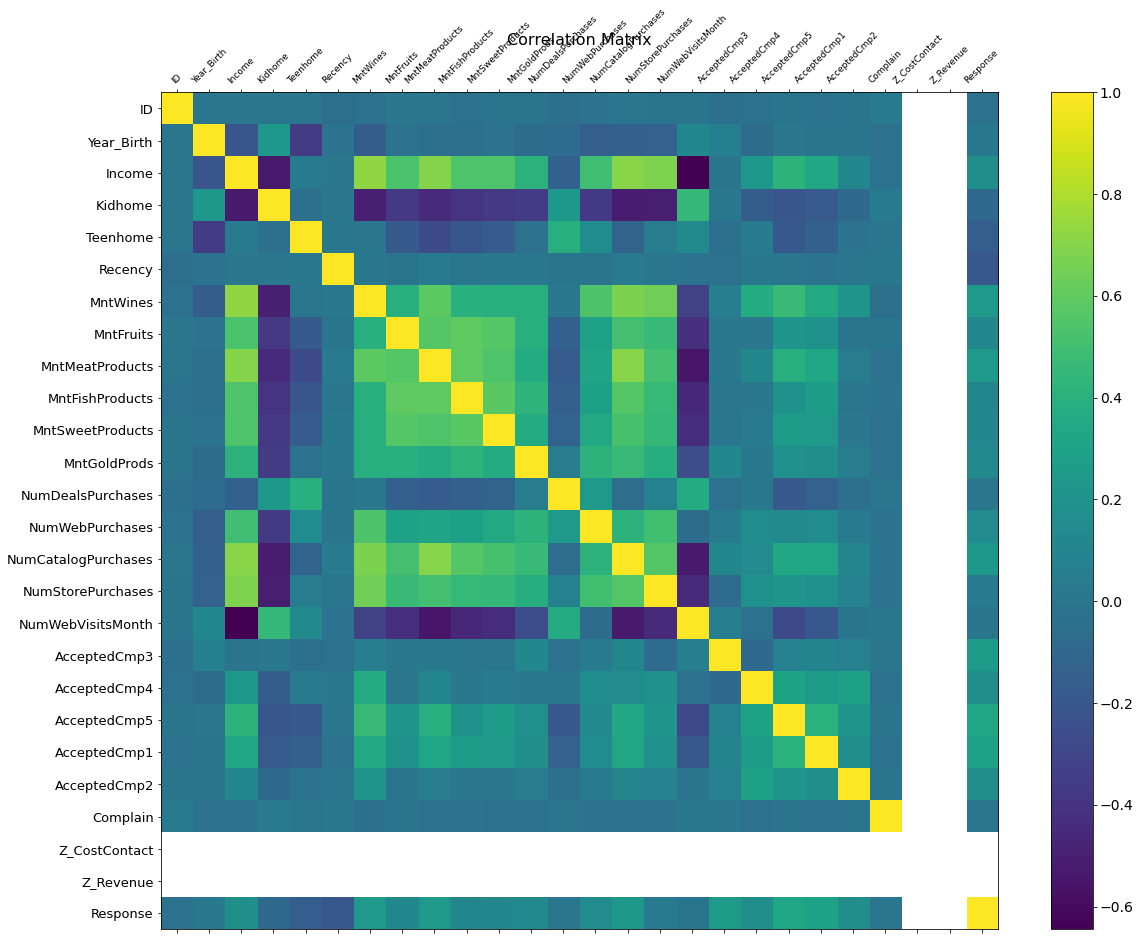

In [17]:
#correlation graph

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [18]:
# removing Z columns

df.drop('Z_CostContact', axis = 1, inplace=True)
df.drop('Z_Revenue', axis = 1, inplace=True)

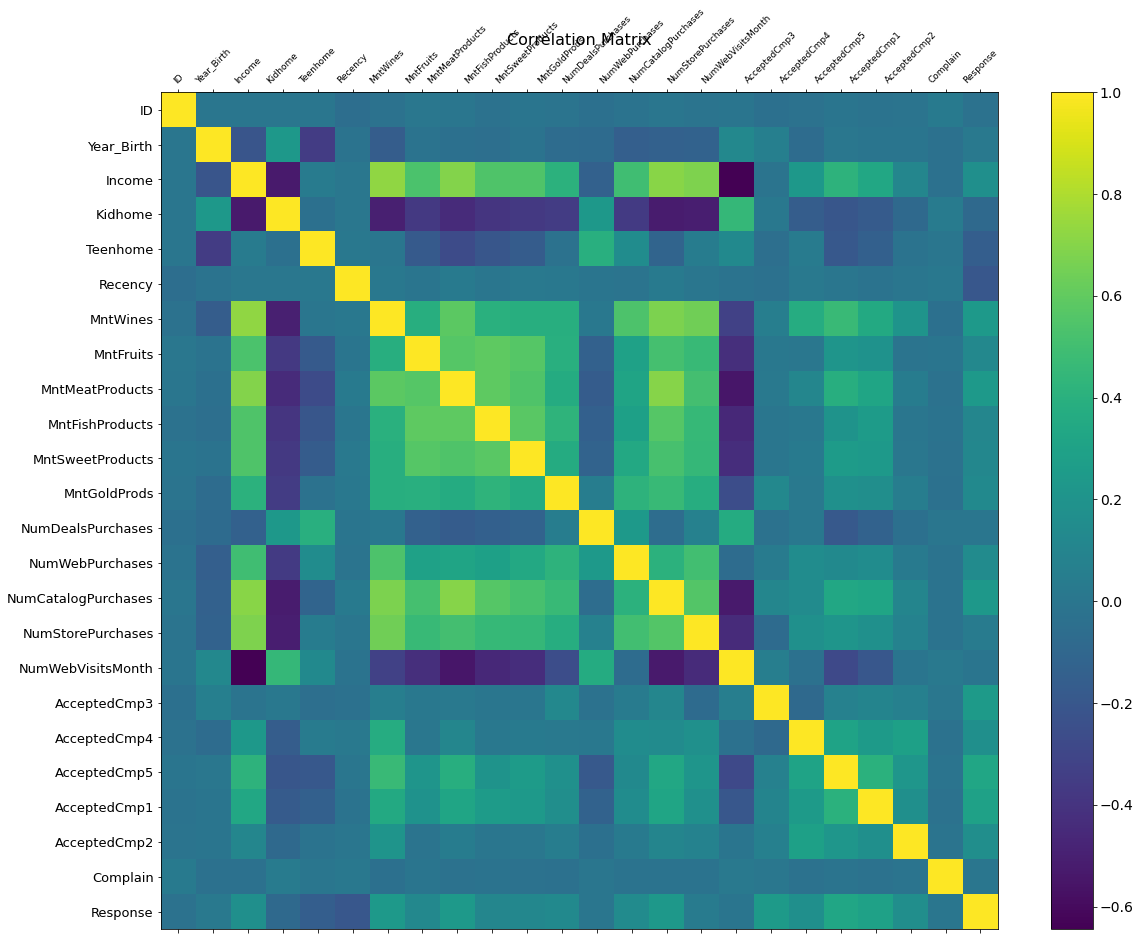

In [19]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);